<a href="https://colab.research.google.com/github/lifelonglearnerit/numerical_methods/blob/main/numerical_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analytic approach:\
$y = f(x);\\ f(x) = x^2;\\ \frac{df(x)}{dx} = 2x$



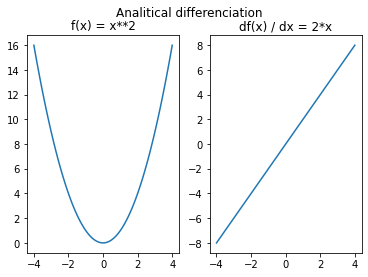

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
# comparing analytical and numerical approach 
# y = f(x); f(x) = x**2
x_start = -4 
x_stop = 4.1
delta_x = 0.1
x = np.arange(x_start, x_stop, delta_x)
y = x ** 2
dydx_an = 2 * x
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Analitical differenciation')
ax1.plot(x, y)
ax2.plot(x, dydx_an)
ax1.set_title('f(x) = x**2')
ax2.set_title('df(x) / dx = 2*x')
dydx_num = np.zeros(x.shape)


$Numeric \ approach: \\ y = f(x);\\ f(x) = x^2;\\ \frac{df(x)}{dx} = \frac{f(x+\Delta x) - f(x)}{\Delta x} = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} = \frac{dy}{dx} = y´=f´(x);\\ \Delta x = x_{i+1} - x_i$

In [ ]:
dydx_num = np.zeros(x.shape)
for i in range(1, len(x)):
  dydx_num[i-1] = (y[i] - y[i-1]) / (x[i] - x[i-1])
for dx_a, dx_n in zip(dydx_an, dydx_num):
  print(dx_a, '|', dx_n)

-8.0 | -7.900000000000002
-7.8 | -7.699999999999989
-7.6 | -7.500000000000011
-7.3999999999999995 | -7.299999999999998
-7.199999999999999 | -7.100000000000002
-6.999999999999999 | -6.899999999999989
-6.799999999999999 | -6.700000000000011
-6.599999999999999 | -6.499999999999998
-6.399999999999999 | -6.299999999999985
-6.199999999999998 | -6.100000000000007
-5.999999999999998 | -5.899999999999993
-5.799999999999998 | -5.700000000000006
-5.599999999999998 | -5.499999999999994
-5.399999999999998 | -5.299999999999998
-5.1999999999999975 | -5.099999999999993
-4.999999999999997 | -4.899999999999998
-4.799999999999997 | -4.700000000000002
-4.599999999999997 | -4.499999999999998
-4.399999999999997 | -4.299999999999994
-4.199999999999997 | -4.099999999999998
-3.9999999999999964 | -3.8999999999999977
-3.7999999999999963 | -3.6999999999999935
-3.599999999999996 | -3.499999999999998
-3.399999999999996 | -3.299999999999993
-3.1999999999999957 | -3.099999999999998
-2.9999999999999956 | -2.8999999999

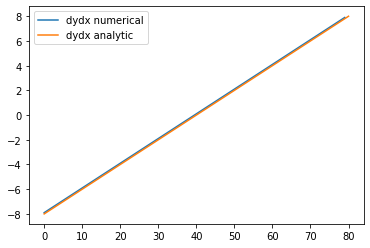

In [ ]:
plt.plot(dydx_num[0:-1], label='dydx numerical')
plt.plot(dydx_an, label='dydx analytic')
plt.legend()

In [ ]:
dydx_num_np = np.diff(y) / np.diff(x)
for a,b,c in zip(dydx_num, dydx_num_np, dydx_an):
  print(a, '|', b, '|', c)

-7.900000000000002 | -7.900000000000002 | -8.0
-7.699999999999989 | -7.699999999999989 | -7.8
-7.500000000000011 | -7.500000000000011 | -7.6
-7.299999999999998 | -7.299999999999998 | -7.3999999999999995
-7.100000000000002 | -7.100000000000002 | -7.199999999999999
-6.899999999999989 | -6.899999999999989 | -6.999999999999999
-6.700000000000011 | -6.700000000000011 | -6.799999999999999
-6.499999999999998 | -6.499999999999998 | -6.599999999999999
-6.299999999999985 | -6.299999999999985 | -6.399999999999999
-6.100000000000007 | -6.100000000000007 | -6.199999999999998
-5.899999999999993 | -5.899999999999993 | -5.999999999999998
-5.700000000000006 | -5.700000000000006 | -5.799999999999998
-5.499999999999994 | -5.499999999999994 | -5.599999999999998
-5.299999999999998 | -5.299999999999998 | -5.399999999999998
-5.099999999999993 | -5.099999999999993 | -5.1999999999999975
-4.899999999999998 | -4.899999999999998 | -4.999999999999997
-4.700000000000002 | -4.700000000000002 | -4.799999999999997
-4.

$\lim_{h\to 0} = \frac{x(t+\Delta t) - x(t)}{\Delta t} \\
przeksztalcajac \ to \ wyrazenie 
\ otrzymujemy \ wzor \ na \ kolejne \ wartosci \ przyblizajace \ \\ x: x(t+\Delta t) = x(t)+Δt \cdotp f(t, x(t)); \\ f(t, x(t)) = \frac{dx(t)}{dt}\\
Znajac \ rozwiazanie \ w \ t_0:x(t_0) = x_0 \\
mozna \ wyznaczyc \ kolejne \ przyblizenia \ szukanej \ funkcji \ w \ punktach \ \\ \{t_0 + n \cdot Δt: n=1, 2, 3, ... \}
  $


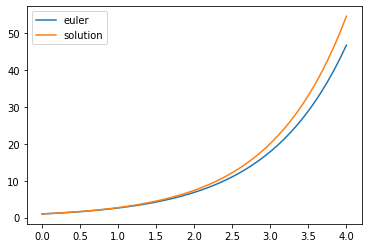

In [ ]:
def euler(t, f, initial=(0, 0)):
    """
    Eulers nummerical method.

    Computes dy and adds it to previous y-value.
    :param t: (list/ array) Time values of function f.
    :param f: (function) y'.
    :param initial:(tpl) Initial values (t0, y0).
    :return: (list/ array) y values.
    """
    # step size
    h = t[1] - t[0]
    y = np.zeros((t.size, ))

    t[0], y[0] = initial

    for i in range(t.size - 1):
        y[i + 1] = y[i] + h * f(t[i], y[i])

    return y

# Note that the t values is not needed for this problem.
def func(t, y):
    return y
def solution(t):
    return np.exp(t)
# initiate the time values.
t = np.linspace(0, 4, 50)
plt.plot(t, euler(t, func, initial=(0, 1)), label='euler')
plt.plot(t, solution(t), label="solution")
plt.legend()
plt.show()

$Runge-Kutta \\ 
y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4) \\ t_{n+1} = t_n + h \\ k_1 - k_4: \\ 
k_1 = f(t_n, y_n) \\ 
k_2 = f(t_n+ \frac{h}{2}, y_n) +\frac{h}{2}k_1) \\ 
k_3 = f(t_n+ \frac{h}{2}, y_n) +\frac{h}{2}k_2) \\
k_4 = f(t_n+ h, y_n) + hk_3) \\ 
the \ function \ f \ is \ the \ derivative \ of \ y: \\ y´ = f(t, y)$

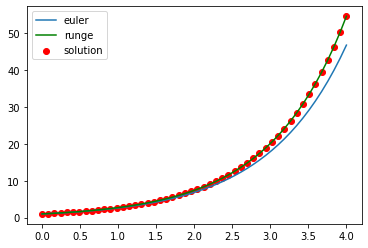

In [ ]:
def runga_kutta_4(t, f, initial=(0, 0)):
    """
    Runga Kutta nummerical method.

    Computes dy and adds it to previous y-value.
    :param t: (list/ array) Time values of function f.
    :param f: (function)
    :param initial:(tpl) Initial values
    :return: (list/ array) y values.
    """
    # step size
    h = t[1] - t[0]
    y = np.zeros((t.size, ))

    t[0], y[0] = initial

    for i in range(t.size - 1):
        k1 = h * f(t[i], y[i])
        k2 = h * f(t[i] + h * 0.5, y[i] + 0.5 * k1)
        k3 = h * f(t[i] + h * 0.5, y[i] + 0.5 * k2)
        k4 = h * f(t[i + 1], y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

# initiate the time values.
t = np.linspace(0, 4, 50)
plt.plot(t, euler(t, func, initial=(0, 1)), label='euler')
plt.scatter(t, solution(t), label="solution", color='r')
plt.plot(t, runga_kutta_4(t, func, initial=(0, 1)), label='runge', color='g')
plt.legend()
plt.show()